In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Menghapus kolom-kolom yang tidak digunakan
book = book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
# Membaca dataset 'Ratings.csv'
rating = pd.read_csv('Ratings.csv')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# Membaca dataset 'Ratings.csv'
user = pd.read_csv('Users.csv')
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


# EDA

In [ ]:
# Menampilkan informasi dataset
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
# Mencari kolom 'Year-Of-Publication' dengan nilai teks
book[(book['Year-Of-Publication'] == 'DK Publishing Inc') | (book['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
# Mengganti nilai 'Book-Author' dan 'Year-Of-Publication' pada indeks tertentu
book['Book-Author'].iloc[209538] = 'DK Publishing Inc'
book['Year-Of-Publication'].iloc[209538] = '2000'

book['Book-Author'].iloc[220731] = 'Gallimard'
book['Year-Of-Publication'].iloc[220731] = '2003'

book['Book-Author'].iloc[221678] = 'DK Publishing Inc'
book['Year-Of-Publication'].iloc[221678] = '2000'

# Mengonversi kolom 'Year-Of-Publication' menjadi tipe data integer
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype('int')

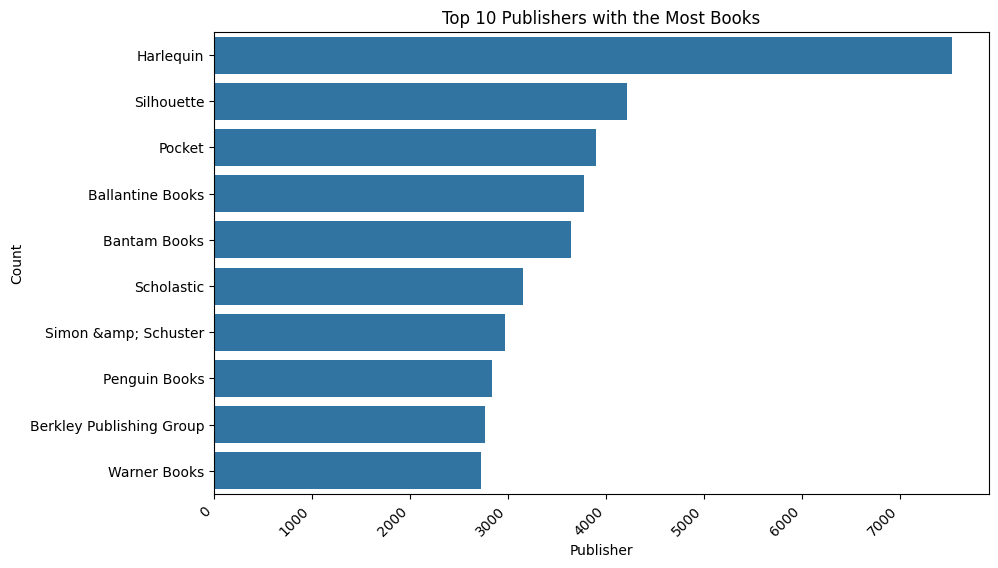

In [ ]:
# Mengganti nilai "Bottom Line Pre$$" dengan "Bottom Line Press" dalam kolom 'Publisher'
book['Publisher'] = book['Publisher'].replace("Bottom Line Pre$$", "Bottom Line Press")

# Menghitung jumlah buku yang diterbitkan oleh setiap penerbit
Publisher_count=book['Publisher'].value_counts()

# Membuat DataFrame dari hasil perhitungan jumlah buku per penerbit
Publisher_count_df = pd.DataFrame(Publisher_count)
Publisher_count_df = Publisher_count_df.reset_index()
Publisher_count_df

# Memilih 10 penerbit teratas
top_10_publishers = Publisher_count_df.head(10)

# # Menggambar bar plot untuk menampilkan 10 publisher dengan buku terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_publishers, x="count", y="Publisher")

# Menambahkan judul plot
plt.title('Top 10 Publishers with the Most Books')

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

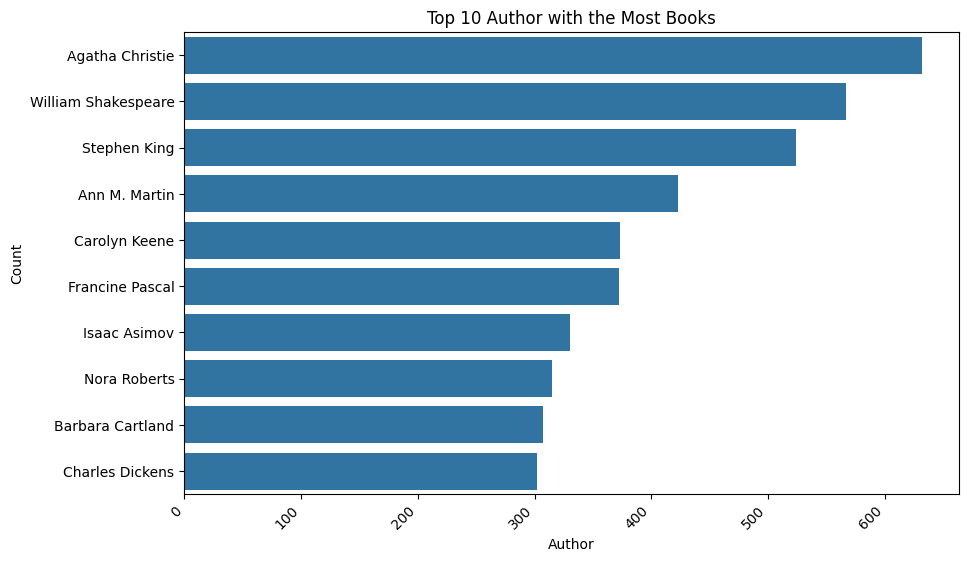

In [ ]:
# Menghitung jumlah buku yang ditulis oleh setiap penulis
Author_count=book['Book-Author'].value_counts()

# Membuat DataFrame dari hasil perhitungan jumlah buku per penulis
Author_count_df = pd.DataFrame(Author_count)
Author_count_df = Author_count_df.reset_index()
Author_count_df

# Memilih 10 penulis teratas
top_10_author = Author_count_df.head(10)

# Menggambar bar plot untuk menampilkan 10 penulis dengan buku terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_author, x="count", y="Book-Author")

# Menambahkan judul plot
plt.title('Top 10 Author with the Most Books')

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

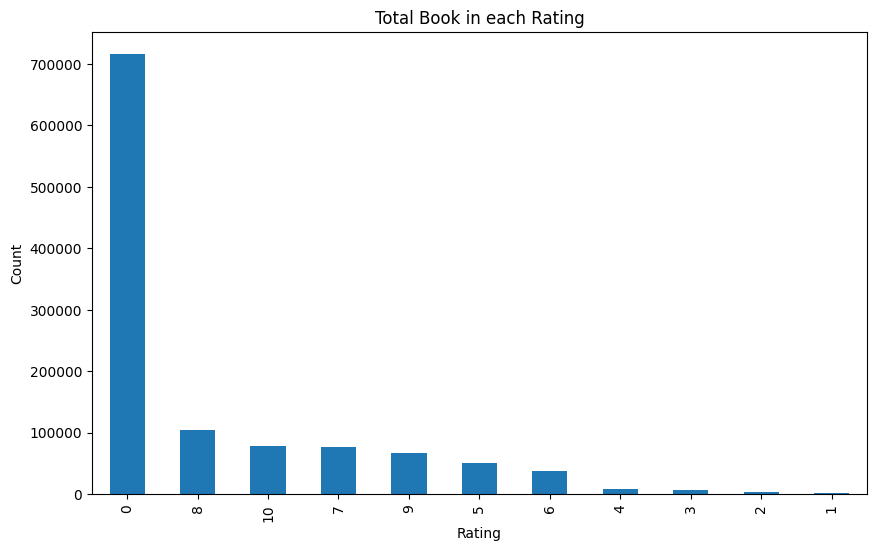

In [ ]:
# Menghitung jumlah buku pada tiap nilai rating
count_book_rating = rating['Book-Rating'].value_counts()

# Menampilkan bar plot
plt.figure(figsize=(10, 6))
count_book_rating.plot(kind='bar')
plt.title('Total Book in each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Data Preparation

In [ ]:
# Menggabungkan dua DataFrame 'rating' dan 'book' berdasarkan kolom 'ISBN' yang sama
book_user_rating_df = rating.merge(book, left_on = 'ISBN', right_on = 'ISBN')
book_user_rating_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [ ]:
# Menampilkan jumlah nilai missing value paka semua kolom
print(book_user_rating_df.isnull().sum())
print(book_user_rating_df.shape)

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64
(1031136, 7)


In [ ]:
# Menghapus baris dengan nilai missing value
book_user_rating_df.dropna(inplace=True)
print(book_user_rating_df.isnull().sum())
print(book_user_rating_df.shape)

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64
(1031132, 7)


In [ ]:
# Menghapus baris dengan nilai rating = 0
book_user_rating_df.drop(book_user_rating_df[book_user_rating_df["Book-Rating"] == 0].index, inplace=True)
book_user_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


## Data Preparation: Content Based Filtering

In [ ]:
# Menghitung rata-rata peringkat buku berdasarkan ISBN
avg_rating = book_user_rating_df.groupby(['Book-Title'])['Book-Rating'].mean()

# Membuat DataFrame dari hasil perhitungan rata-rata peringkat
avg_rating = pd.DataFrame(avg_rating)
avg_rating = avg_rating.reset_index()

# Mengubah nama kolom 'Book-Rating' menjadi 'Avg-Rating'
content_based_df = avg_rating.rename(columns={"Book-Rating": "Avg-Rating"})
content_based_df

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135560,Ã?Â?rger mit Produkt X. Roman.,7.000000
135561,Ã?Â?sterlich leben.,7.000000
135562,Ã?Â?stlich der Berge.,8.000000


In [ ]:
# Memfilter DataFrame content_based_df untuk baris-baris di mana nilai 'Avg-Rating' sama dengan 10.0
content_based_df = content_based_df[content_based_df['Avg-Rating'] == 10.0].reset_index(drop=True)
content_based_df

,Book-Title,Avg-Rating
0,Dark Justice,10.0
1,Final Fantasy Anthology: Official Strategy Gu...,10.0
2,"The Secret of the Old Clock (Nancy Drew, Book 1)",10.0
3,'California Historical Landmarks',10.0
4,"'Isms: a dictionary of words ending in -ism, -...",10.0
...,...,...
18251,touch the flame,10.0
18252,"Â¡Corre, perro, corre!",10.0
18253,Ã? sucesso solo 50 anni fa: Lo sterminio di se...,10.0
18254,Ã?Â?a,10.0


In [ ]:
# Membuat dataframe hanya dengan kolom 'Book-Title' hasil filter sebelumnya
content_based_df = content_based_df[['Book-Title']]
content_based_df

,Book-Title
0,Dark Justice
1,Final Fantasy Anthology: Official Strategy Gu...
2,"The Secret of the Old Clock (Nancy Drew, Book 1)"
3,'California Historical Landmarks'
4,"'Isms: a dictionary of words ending in -ism, -..."
...,...
18251,touch the flame
18252,"Â¡Corre, perro, corre!"
18253,Ã? sucesso solo 50 anni fa: Lo sterminio di se...
18254,Ã?Â?a


## Data Preparation: Collaborative Based Filtering

### Filter Buku berdasarkan Jumlah Rating

In [ ]:
# Membuat dataframe baru dengan kolom 'User-ID', 'Book-Title', dan 'Book-Rating'
book_user_rating = book_user_rating_df[["User-ID","ISBN", "Book-Title","Book-Rating"]]
book_user_rating

,User-ID,ISBN,Book-Title,Book-Rating
1,2313,034545104X,Flesh Tones: A Novel,5
3,8680,034545104X,Flesh Tones: A Novel,5
4,10314,034545104X,Flesh Tones: A Novel,9
9,50403,034545104X,Flesh Tones: A Novel,9
13,63970,034545104X,Flesh Tones: A Novel,8
...,...,...,...,...
1031123,276681,1931333246,Chorus,10
1031124,276683,0316185922,The River Cafe Wine Primer,5
1031127,276688,0312264186,You Can't Catch Death: A Daughter's Memoir,8
1031132,276688,1575660792,Gray Matter,7


In [ ]:
# Menghitung total jumlah peringkat setiap buku berdasarkan judulnya dan mengubah nama kolom menjadi 'Total-Rating-Count'
book_rating_count = book_user_rating.groupby(by=["ISBN"])["Book-Rating"].count().reset_index().rename(columns = {'Book-Rating': 'Total-Rating-Count'})[["ISBN", "Total-Rating-Count"]]
book_rating_count

,ISBN,Total-Rating-Count
0,0000913154,1
1,0001046438,1
2,000104687X,1
3,0001047213,1
4,0001047973,2
...,...,...
149827,B0001FZGPI,1
149828,B0001FZGRQ,1
149829,B0001GMSV2,2
149830,B0001I1KOG,1


In [ ]:
# Menggabungkan DataFrame book_user_rating dengan DataFrame book_rating_count berdasarkan kolom 'Book-Title',
book_rating = book_user_rating.merge(book_rating_count, left_on='ISBN', right_on='ISBN', how='left').reset_index(drop=True)
book_rating

,User-ID,ISBN,Book-Title,Book-Rating,Total-Rating-Count
0,2313,034545104X,Flesh Tones: A Novel,5,28
1,8680,034545104X,Flesh Tones: A Novel,5,28
2,10314,034545104X,Flesh Tones: A Novel,9,28
3,50403,034545104X,Flesh Tones: A Novel,9,28
4,63970,034545104X,Flesh Tones: A Novel,8,28
...,...,...,...,...,...
383833,276681,1931333246,Chorus,10,1
383834,276683,0316185922,The River Cafe Wine Primer,5,1
383835,276688,0312264186,You Can't Catch Death: A Daughter's Memoir,8,1
383836,276688,1575660792,Gray Matter,7,1


In [ ]:
# Memilih kolom dengan 'Total-Rating-Count' >= 50
collaborative_filtering_df = book_rating[book_rating['Total-Rating-Count']>=50].reset_index(drop=True)
collaborative_filtering_df

,User-ID,ISBN,Book-Title,Book-Rating,Total-Rating-Count
0,7158,0446520802,The Notebook,10,56
1,8253,0446520802,The Notebook,10,56
2,11676,0446520802,The Notebook,10,56
3,12589,0446520802,The Notebook,9,56
4,13279,0446520802,The Notebook,10,56
...,...,...,...,...,...
49560,246311,0385503954,Atonement: A Novel,8,50
49561,246328,0385503954,Atonement: A Novel,9,50
49562,253330,0385503954,Atonement: A Novel,9,50
49563,255846,0385503954,Atonement: A Novel,9,50


In [ ]:
# Menghapus baris duplikat
collaborative_filtering_df.drop_duplicates(['User-ID', 'ISBN'],inplace=True)

# Menghapus kolom 'Total-Rating-Count'
collaborative_filtering_df.drop(columns=['Total-Rating-Count'], inplace=True)
collaborative_filtering_df.reset_index(drop=True)

,User-ID,ISBN,Book-Title,Book-Rating
0,7158,0446520802,The Notebook,10
1,8253,0446520802,The Notebook,10
2,11676,0446520802,The Notebook,10
3,12589,0446520802,The Notebook,9
4,13279,0446520802,The Notebook,10
...,...,...,...,...
49560,246311,0385503954,Atonement: A Novel,8
49561,246328,0385503954,Atonement: A Novel,9
49562,253330,0385503954,Atonement: A Novel,9
49563,255846,0385503954,Atonement: A Novel,9


### Encoding `User-ID` dan `ISBN` menjadi Integer

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_id = collaborative_filtering_df['User-ID'].unique().tolist()
print('list userID: ', user_id)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [7158, 8253, 11676, 12589, 13279, 19371, 23768, 24878, 26525, 27617, 30261, 30711, 35845, 54823, 63507, 64544, 64679, 85993, 91761, 99085, 99720, 131993, 132792, 133498, 139064, 141444, 152376, 153718, 154992, 157823, 158295, 167812, 169699, 169784, 170902, 172539, 181687, 185233, 187863, 190374, 192095, 199799, 200226, 201036, 208671, 211361, 218875, 235218, 239135, 240756, 245568, 248477, 249200, 265383, 268540, 268751, 276744, 16877, 17975, 20806, 21340, 21356, 22625, 23243, 29168, 31315, 32188, 33974, 34588, 35288, 37800, 53220, 53614, 60337, 64436, 75819, 76151, 76351, 76851, 97919, 98168, 100471, 100846, 101226, 104051, 109180, 111174, 111358, 113425, 114368, 115003, 115375, 115435, 116904, 123645, 125519, 130571, 135741, 136439, 140358, 141719, 145641, 147224, 149069, 149696, 151819, 152354, 153418, 153959, 172881, 178006, 187256, 187621, 193778, 197206, 198213, 200422, 203506, 206754, 210485, 212568, 213379, 215988, 218615, 235146, 240643, 245901, 251164, 252820, 

In [ ]:
# Mengubah placeID menjadi list tanpa nilai yang sama
book_isbn = collaborative_filtering_df['ISBN'].unique().tolist()

# Melakukan proses encoding placeID
book_to_book_encoded = {x: i for i, x in enumerate(book_isbn)}

# Melakukan proses encoding angka ke placeID
book_encoded_to_book = {i: x for i, x in enumerate(book_isbn)}

In [ ]:
# Mapping userID ke dataframe user
collaborative_filtering_df['users'] = collaborative_filtering_df['User-ID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe buku
collaborative_filtering_df['books'] = collaborative_filtering_df['ISBN'].map(book_to_book_encoded)

In [ ]:
collaborative_filtering_df

,User-ID,ISBN,Book-Title,Book-Rating,users,books
0,7158,0446520802,The Notebook,10,0,0
1,8253,0446520802,The Notebook,10,1,0
2,11676,0446520802,The Notebook,10,2,0
3,12589,0446520802,The Notebook,9,3,0
4,13279,0446520802,The Notebook,10,4,0
...,...,...,...,...,...,...
49560,246311,0385503954,Atonement: A Novel,8,1805,530
49561,246328,0385503954,Atonement: A Novel,9,8889,530
49562,253330,0385503954,Atonement: A Novel,9,20817,530
49563,255846,0385503954,Atonement: A Novel,9,7421,530


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
collaborative_filtering_df['Book-Rating'] = collaborative_filtering_df['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(collaborative_filtering_df['Book-Rating'])

# Nilai maksimal rating
max_rating = max(collaborative_filtering_df['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

20819
531
Number of User: 20819, Number of Book: 531, Min Rating: 1.0, Max Rating: 10.0


### Membagi dataset

In [ ]:
# Mengacak dataset
df = collaborative_filtering_df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Title,Book-Rating,users,books
30506,41589,044021145X,The Firm,9.0,2300,280
29161,100088,006016848X,"Men Are from Mars, Women Are from Venus: A Pra...",9.0,397,264
5035,221705,0446611212,Violets Are Blue,5.0,3900,36
22220,40612,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,6.0,11758,194
22882,60050,0440226430,Summer Sisters,9.0,2543,197
...,...,...,...,...,...,...
11284,148220,0446608955,A Walk to Remember,8.0,7703,88
44732,40415,0451191145,Atlas Shrugged,10.0,462,456
38158,124874,0312278586,The Nanny Diaries: A Novel,9.0,900,373
860,210874,0060096195,The Boy Next Door,9.0,799,10


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['users', 'books']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[2300  280]
 [ 397  264]
 [3900   36]
 ...
 [ 900  373]
 [ 799   10]
 [4481  131]] [0.88888889 0.88888889 0.44444444 ... 0.88888889 0.88888889 0.88888889]


# Content Based Filtering

## TF-IDF

In [ ]:
# Inisialisasi TfidfVectorizer
tfv = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_title
tfv.fit(content_based_df['Book-Title'])

TfidfVectorizer()

In [ ]:
# Melakukan fitting dan transformasi pada data teks menggunakan TF-IDF Vectorizer
tfidf_matrix = tfv.fit_transform(content_based_df['Book-Title'])

# Mengembalikan bentuk matriks TF-IDF yang dihasilkan
tfidf_matrix.shape

(18256, 19164)

In [ ]:
# Mengubah matriks menjadi format dense matriks
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Mengonversi matriks TF-IDF menjadi DataFrame Pandas
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfv.get_feature_names_out(),
    index=content_based_df['Book-Title']).sample(22, axis=1).sample(10, axis=0)

,magick,lifted,ndern,chemical,fade,foxes,singreale,scenes,nland,vii,...,blows,graduates,sibley,622,featuring,chameleons,enormous,arcade,feasts,zauberhaft
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Okomi and the Tickling Game (The Okomi Series, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Die letzte Zauberin. Valorians Kinder.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Discovering H.P. Lovecraft,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wild Life of Pets: A Rubes Cartoon Book (Rubes(r) Cartoon Pet),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biggie and the Meddlesome Mailman : A Mystery (Biggie),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Thomas Merton in Alaska: The Alaskan Conferences, Journals, and Letters (New Directions Paperbook)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ultimate Spy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Catfantastic IV (Daw Book Collectors),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Postman Pat's Wet Day (Postman Pat - Easy Reader),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [ ]:
# Menghitung similarity antar dokumen menggunakan metode cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Menampilkan Rekomendasi Buku berdasarkan Kata Kunci Judul Buku

In [ ]:
def recommendation(words):
    # Mendapatkan indeks buku yang memiliki judul yang mengandung string 'book_title'
    isbn_of_book = content_based_df[content_based_df['Book-Title'].str.contains(words,case=False)].index[0]

    # Mendapatkan similarity score antara buku dengan buku-buku lain
    distances = cosine_sim[isbn_of_book]

    # Mengurutkan dan memilih 10 buku dengan similarity tertinggi (kecuali buku itu sendiri)
    book_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    # Menampilkan judul buku-buku yang direkomendasikan
    for i in book_list:
        print(content_based_df.iloc[i[0]]['Book-Title'])

In [ ]:
# Memanggil fungsi 'recommendation' untuk mendapatkan rekomendasi buku dari kata
recommendation('Harry Potter')

Harry Potter and the Prisoner of Azkaban Color and Activity Book (Harry Potter)
Harry Potter, tome 3 : Harry Potter et le Prisonnier d'Azkaban
The Potter
Harry Potter and the Goblet of Fire (Harry Potter)
The Magical Worlds of Harry Potter


# Collaborative Filtering

### Proses Training Model

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# inisialisasi model
model = RecommenderNet(num_users, num_book, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Membuat callback untuk mengurangi learning rate jika tidak ada perbaikan dalam 'val_loss' selama beberapa epochs.
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', # Memantau 'val_loss' untuk pengurangan learning rate.
    factor=0.2, # Faktor pengurangan learning rate.
    patience=5, # Jumlah epochs yang harus dilewati tanpa perbaikan sebelum learning rate dikurangi.
    min_lr=1.5e-5 # Learning rate minimum yang dapat dicapai.
)

# Membuat callback untuk menghentikan pelatihan jika tidak ada perbaikan dalam 'val_loss' selama beberapa epochs.
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", # Memantau 'val_loss' untuk penghentian dini.
    min_delta=0, # Perubahan minimal yang dianggap sebagai perbaikan.
    patience=12, # Jumlah epochs yang harus dilewati tanpa perbaikan sebelum pelatihan dihentikan.
    verbose=0, # Verbosity mode.
    mode="auto", # Mode untuk menentukan jika 'val_loss' harus diminimalkan atau maksimalkan.
    baseline=None, # Nilai referensi untuk membandingkan 'val_loss' (tidak digunakan dalam contoh ini).
    restore_best_weights=True # Mengembalikan bobot terbaik setelah pelatihan dihentikan.
)


In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 30,
    validation_data = (x_val, y_val),
    callbacks = [reduce_lr, early_stop]
)

Epoch 1/30
4957/4957 [==============================] - 38s 6ms/step - loss: 0.6106 - root_mean_squared_error: 0.2572 - val_loss: 0.5590 - val_root_mean_squared_error: 0.1997 - lr: 0.0010
Epoch 2/30
4957/4957 [==============================] - 22s 4ms/step - loss: 0.5430 - root_mean_squared_error: 0.1876 - val_loss: 0.5611 - val_root_mean_squared_error: 0.2026 - lr: 0.0010
Epoch 3/30
4957/4957 [==============================] - 22s 4ms/step - loss: 0.5360 - root_mean_squared_error: 0.1805 - val_loss: 0.5557 - val_root_mean_squared_error: 0.1969 - lr: 0.0010
Epoch 4/30
4957/4957 [==============================] - 23s 5ms/step - loss: 0.5306 - root_mean_squared_error: 0.1749 - val_loss: 0.5539 - val_root_mean_squared_error: 0.1953 - lr: 0.0010
Epoch 5/30
4957/4957 [==============================] - 23s 5ms/step - loss: 0.5263 - root_mean_squared_error: 0.1704 - val_loss: 0.5524 - val_root_mean_squared_error: 0.1940 - lr: 0.0010
Epoch 6/30
4957/4957 [==============================] - 21s 

### Visualisasi Metrik

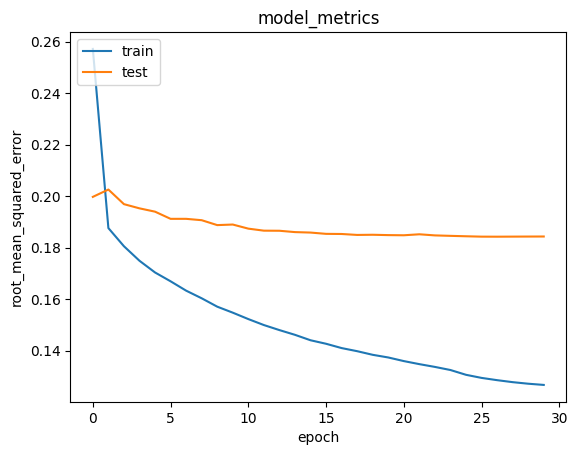

In [ ]:
# Plot nilai root mean squared error (RMSE) untuk setiap epoch pada data pelatihan dan validasi.
plt.plot(history.history['root_mean_squared_error']) # Plot RMSE pada data pelatihan.
plt.plot(history.history['val_root_mean_squared_error']) # Plot RMSE pada data validasi.
plt.title('model_metrics') # Judul plot.
plt.ylabel('root_mean_squared_error') # Label sumbu y.
plt.xlabel('epoch') # Label sumbu x.
plt.legend(['train', 'test'], loc='upper left') # Menambahkan legenda untuk setiap garis.
plt.show() # Menampilkan plot.

### Mendapatkan Rekomendasi Buku

In [ ]:
# Mendefinisikan ID pengguna yang akan diprediksi preferensinya.
user_id = collaborative_filtering_df['User-ID'].sample(1).iloc[0]

# Mendapatkan daftar buku yang telah dibeli oleh pengguna.
book_bought_by_user = collaborative_filtering_df[collaborative_filtering_df["User-ID"] == user_id]

# Mengidentifikasi buku yang belum dibeli oleh pengguna berdasarkan daftar buku yang tersedia.
book_not_bought = collaborative_filtering_df[~collaborative_filtering_df['ISBN'].isin(book_bought_by_user["ISBN"].values)]["ISBN"]

# Mengonversi daftar buku yang belum dibeli menjadi daftar yang sesuai dengan buku-buku yang tersedia di dalam model.
book_not_bought = list(
    set(book_not_bought)
    .intersection(set(book_to_book_encoded.keys()))
)
# Mengonversi daftar buku yang belum dibeli menjadi representasi terenkripsi yang sesuai.
book_not_bought = [[book_to_book_encoded.get(x)] for x in book_not_bought]

# Mendapatkan representasi terenkripsi dari pengguna yang akan diprediksi preferensinya.
user_encoder = user_to_user_encoded.get(user_id)

# Membuat array yang berisi representasi terenkripsi pengguna dan representasi terenkripsi buku yang belum dibeli oleh pengguna.
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_bought), book_not_bought)
)

In [ ]:
# Melakukan prediksi rating untuk buku yang belum dibeli oleh pengguna.
rating = model.predict(user_book_array).flatten()

# Mendapatkan indeks 10 rating tertinggi.
top_ratings_indices = rating.argsort()[-10:][::-1]

# Mendapatkan ISBN buku-buku yang direkomendasikan berdasarkan indeks rating tertinggi.
recommended_book_ids = [
    book_encoded_to_book.get(book_not_bought[x][0]) for x in top_ratings_indices
]

# Menampilkan judul-judul buku yang telah mendapat rating tinggi dari pengguna.
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

# Mendapatkan ISBN dari 5 buku teratas yang telah dibeli oleh pengguna.
top_book_user = (
    book_bought_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

# Menampilkan detail buku-buku yang telah dibeli oleh pengguna.
book_df_rows = book[book['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
  print(row._2, "by", row._3)

print('----' * 8)
print('Top 10 Book recommendation')
print('----' * 8)

# Menampilkan judul-judul buku yang direkomendasikan.
recommended_book = book[book['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row._2, "by", row._3)

17/17 [==============================] - 0s 2ms/step
Showing recommendations for users: 638
Book with high ratings from user
--------------------------------
The Catcher in the Rye by J.D. Salinger
The Lovely Bones: A Novel by Alice Sebold
The Da Vinci Code by Dan Brown
The Pilot's Wife : A Novel Tag: Author of the Weight of Water (Oprah's Book Club (Hardcover)) by Anita Shreve
Me Talk Pretty One Day by David Sedaris
--------------------------------
Top 10 Book recommendation
--------------------------------
To Kill a Mockingbird by Harper Lee
The Little Prince by Antoine de Saint-ExupÃ©ry
The Giver (21st Century Reference) by LOIS LOWRY
1984 by George Orwell
East of Eden (Oprah's Book Club) by John Steinbeck
Charlotte's Web (Trophy Newbery) by E. B. White
The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN
Harry Potter and the Goblet of Fire (Book 4) by J. K. Rowling
Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling
Harry Potter and the Sorcerer's